In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Display all Skewed Image

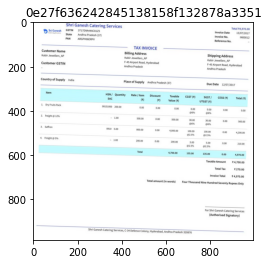

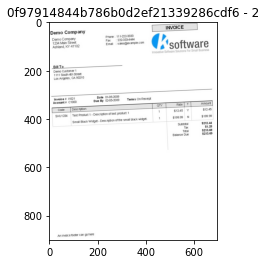

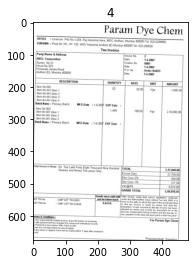

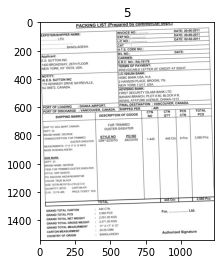

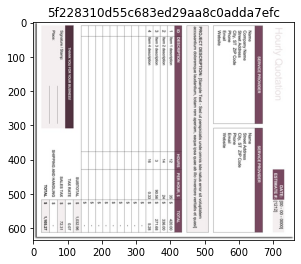

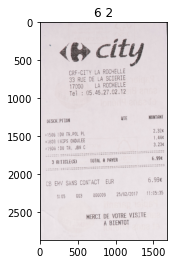

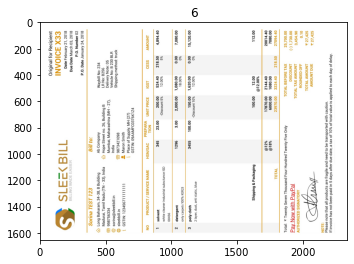

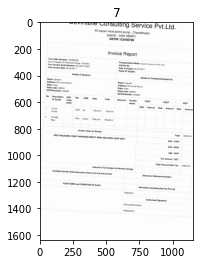

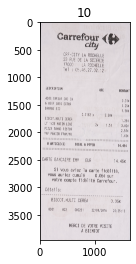

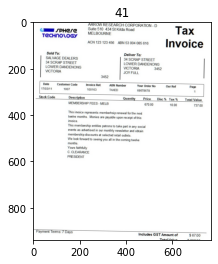

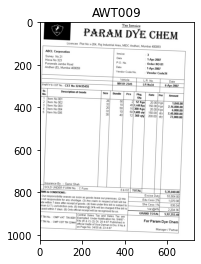

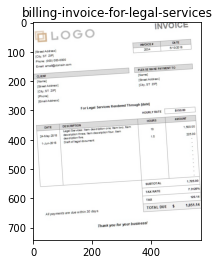

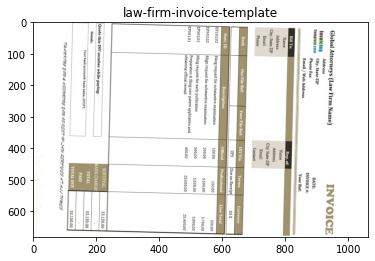

In [2]:
img_list = ["0e27f636242845138158f132878a3351", "0f97914844b786b0d2ef21339286cdf6 - 2", "4", "5", "5f228310d55c683ed29aa8c0adda7efc", "6 2", "6", "7", "10", "41", "AWT009", "billing-invoice-for-legal-services", "law-firm-invoice-template"]
for img in img_list:
    image = cv2.imread(f'C:/Users/advay/Downloads/codingtaskadvaymehtadocsumo/misaligned_images/misaligned_images/{img}.jpg')
    plt.imshow(image)
    plt.title(img)
    plt.show()

# Detection of Misaligned Images
1.contrast the image  
2.thresholding the image for edge detection  
3.foreground to 255 and background to 0  
4.Calculated the roation angle by creating bounding Rectangle  
5.if rotaion_angle != 0 : Image is Misaglined with the horizontal and Vertical Axes

Misaligned Image: 0e27f636242845138158f132878a3351



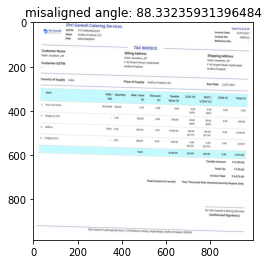

Misaligned Image: 0f97914844b786b0d2ef21339286cdf6 - 2



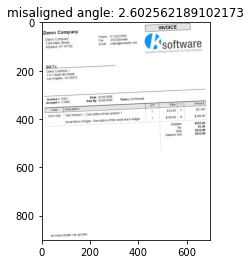

Misaligned Image: 4



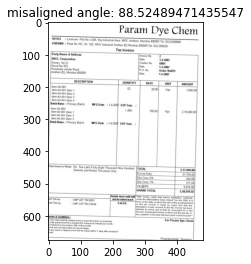

Misaligned Image: 5



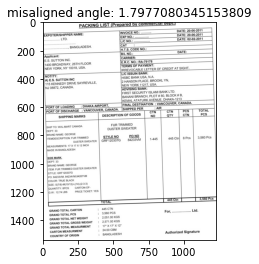

Misaligned Image: 5f228310d55c683ed29aa8c0adda7efc



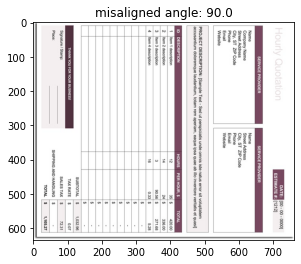

Misaligned Image: 6 2



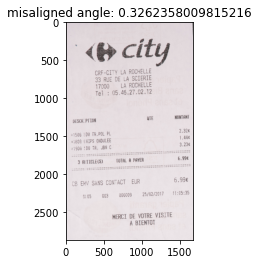

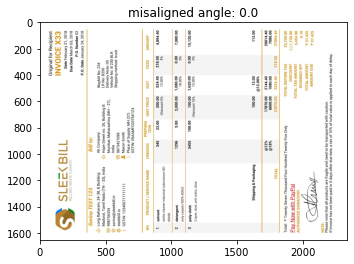

Misaligned Image: 7



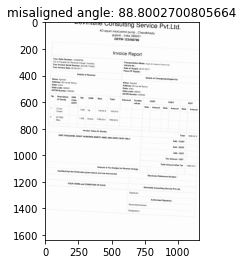

Misaligned Image: 10



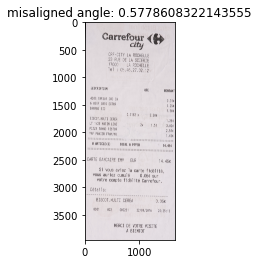

Misaligned Image: 41



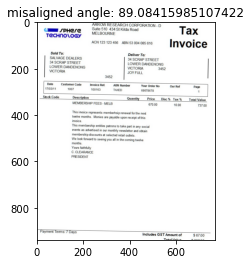

Misaligned Image: AWT009



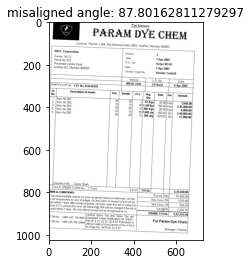

Misaligned Image: billing-invoice-for-legal-services



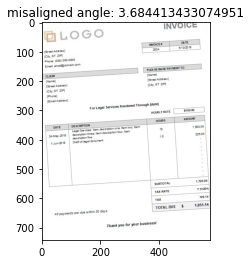

Misaligned Image: law-firm-invoice-template



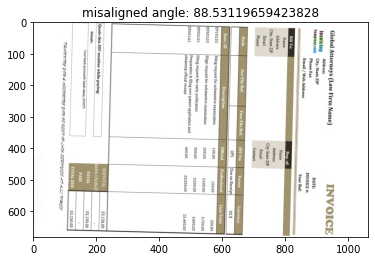

In [16]:
for img in img_list:
    image = cv2.imread(f'C:/Users/advay/Downloads/codingtaskadvaymehtadocsumo/misaligned_images/misaligned_images/{img}.jpg')
#     plt.imshow(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)

    # threshold the image, setting all foreground pixels to
    # 255 and all background pixels to 0
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    coords = np.column_stack(np.where(thresh > 0))
    h, w, angle = cv2.minAreaRect(coords)

    # the `cv2.minAreaRect` function returns values in the
    # range [-90, 0); as the rectangle rotates clockwise the
    # returned angle trends to 0 -- in this special case we
    # need to add 90 degrees to the angle
#     print(angle)
    if angle != 0:
        print("Misaligned Image: "+img+"\n")
    plt.imshow(image)
    plt.title(f'misaligned angle: {angle}')
    plt.show()
    
    

# Correction of Misalgined Image
after finiding the roation angle we just have to reverse skew the tranformation  we have to check for correct angle by Rectangle System Coordinate so,
we can inverse the skewness through rotation matrix by center  
then write the correct algined Images to Disk

rect ang 1.6676406860351562
983 994
angle: 1.668


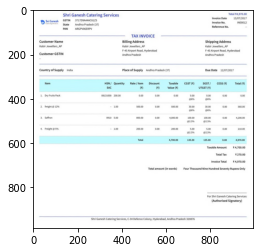

rect ang -2.602562189102173
901 697
angle: -2.603


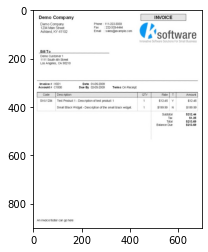

rect ang 1.4751052856445312
675 480
angle: 1.475


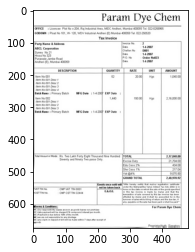

rect ang -1.7977080345153809
1539 1231
angle: -1.798


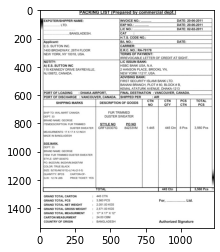

rect ang 0.0
635 762
angle: 90.000


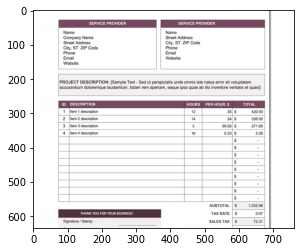

rect ang -0.3262358009815216
2868 1675
angle: -0.326


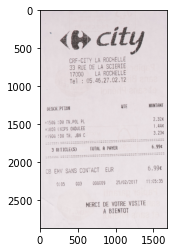

rect ang 180
1653 2338
angle: 270.000


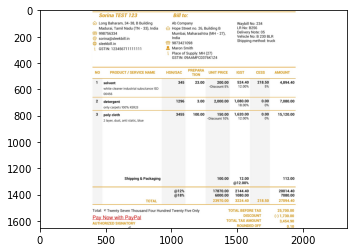

rect ang 1.1997299194335938
1637 1157
angle: 1.200


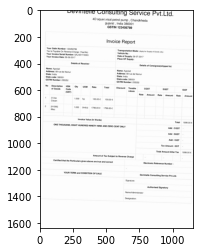

rect ang -0.5778608322143555
3958 1638
angle: -0.578


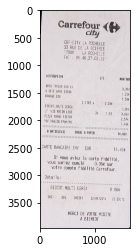

rect ang 0.9158401489257812
939 768
angle: 0.916


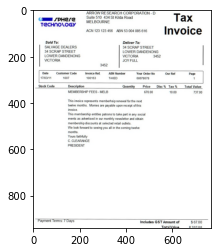

rect ang 2.1983718872070312
1024 727
angle: 2.198


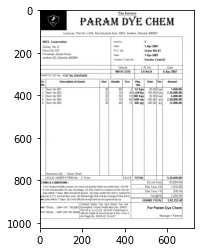

rect ang -3.684413433074951
742 573
angle: -3.684


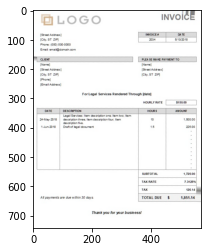

rect ang 1.4688034057617188
682 1064
angle: 91.469


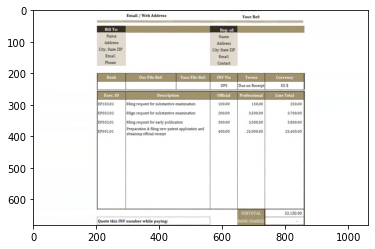

In [21]:
# # the `cv2.minAreaRect` function returns values in the
# # range [-90, 0); as the rectangle rotates clockwise the
# # returned angle trends to 0 -- in this special case we
# # need to add 90 degrees to the angle
img_list = ["0e27f636242845138158f132878a3351", "0f97914844b786b0d2ef21339286cdf6 - 2", "4", "5", "5f228310d55c683ed29aa8c0adda7efc", "6 2", "6", "7", "10", "41", "AWT009", "billing-invoice-for-legal-services", "law-firm-invoice-template"]
for img in img_list:
    image = cv2.imread(f'C:/Users/advay/Downloads/codingtaskadvaymehtadocsumo/misaligned_images/misaligned_images/{img}.jpg')
#   plt.imshow(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)

    # threshold the image, setting all foreground pixels to
    # 255 and all background pixels to 0
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # grab the (x, y) coordinates of all pixel values that
    # are greater than zero, then use these coordinates to
    # compute a rotated bounding box that contains all
    # coordinates
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    
    #angle correction for rectangular coordinate system
#   print(angle)
#   print("init ang", angle)
    if angle < -45:
        angle = (90 + angle)
    elif angle > 45:
        angle = (90 - angle)
    else:
        if angle == 0:
            angle = 180
        else:
            # otherwise, just take the inverse of the angle to make
            # it positive
            angle = -angle
        
    print("rect ang",angle)
    (h, w) = image.shape[:2]
    print(h, w)
    # Assumption : Align Image will be Potrait
    if w > h+100 and angle != 0:
        angle = 90+angle
    if angle == 0.0 and w>h+100:
        angle = 90

    #Calculating Center of Rectangular Bounding Box
    center = (w // 2, h // 2)
    
    #Inverse Rotating the Image
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
#     cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
#     (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # show the output image
    print("angle: {:.3f}".format(angle))
    plt.imshow(image)
    plt.imshow(rotated)
    filename=f'aligned-{img}.jpg'
    cv2.imwrite(filename, rotated)
    plt.show()
    
    

#### Ref : 
https://stackoverflow.com/questions/57964634/python-opencv-skew-correction-for-ocr  
https://stackoverflow.com/questions/30273251/de-skew-characters-in-binary-image?noredirect=1&lq=1
https://stackoverflow.com/questions/33698068/align-text-for-ocr  
https://www.pyimagesearch.com/2017/02/20/text-skew-correction-opencv-python/